# Determine a Good Observatory Location

In this project, we are about to introduce some basic standards of defining a good observing night and see if Zhongli is a good option for astronomical observatories.

## Table of Contents
<div class="toc">
  <ul>
    <li><a href="#data">Data</a></li>
    <li><a href="#basic">Basic Standards</a></li>
    <li><a href="#sum">Summary</a></li>
    <li><a href="#ref">References</a></li>
    <li><a href="#append1">Appendix1: The Bortle Scale</a></li>
    <li><a href="#append2">Appendix2: Types of Light Pollution</a></li>
  </ul>
</div>

<h1 id="data">Data</h1>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Read our data
weather = pd.read_csv('weather.csv', parse_dates=['Date time'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43733 entries, 0 to 43732
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 43733 non-null  object        
 1   Date time            43733 non-null  datetime64[ns]
 2   Maximum Temperature  43729 non-null  float64       
 3   Minimum Temperature  43729 non-null  float64       
 4   Temperature          43729 non-null  float64       
 5   Wind Chill           204 non-null    float64       
 6   Heat Index           15976 non-null  float64       
 7   Precipitation        43733 non-null  float64       
 8   Snow                 0 non-null      float64       
 9   Snow Depth           0 non-null      float64       
 10  Wind Speed           43729 non-null  float64       
 11  Wind Direction       43491 non-null  float64       
 12  Wind Gust            2073 non-null   float64       
 13  Visibility           43728 non-

In [3]:
#The main parameters of our project
weather = weather[['Date time', 'Temperature', 'Precipitation', 'Wind Speed', 'Visibility', 'Cloud Cover', 'Relative Humidity', 'Conditions']]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43733 entries, 0 to 43732
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date time          43733 non-null  datetime64[ns]
 1   Temperature        43729 non-null  float64       
 2   Precipitation      43733 non-null  float64       
 3   Wind Speed         43729 non-null  float64       
 4   Visibility         43728 non-null  float64       
 5   Cloud Cover        43729 non-null  float64       
 6   Relative Humidity  43729 non-null  float64       
 7   Conditions         43729 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 2.7+ MB


In [4]:
#Select night time
weather_new = weather.set_index("Date time").between_time('18:00', '6:00')
weather_new.head()

,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
Date time,,,,,,,
2016-01-01 00:00:00,17.0,0.0,21.0,3.8,89.0,65.19,Overcast
2016-01-01 01:00:00,16.4,0.0,20.1,3.7,70.6,67.84,Partially cloudy
2016-01-01 02:00:00,16.1,0.0,19.2,3.8,58.2,72.49,Partially cloudy
2016-01-01 03:00:00,17.0,0.0,20.6,4.9,89.0,67.77,Overcast
2016-01-01 04:00:00,17.0,0.0,20.9,5.0,89.0,67.77,Overcast


In [5]:
weather_new.tail()

,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
Date time,,,,,,,
2020-12-30 20:00:00,10.2,0.0,16.0,6.2,82.2,63.56,Overcast
2020-12-30 21:00:00,10.1,0.0,17.3,6.2,89.0,64.21,Overcast
2020-12-30 22:00:00,10.1,0.0,19.5,6.2,89.0,63.65,Overcast
2020-12-30 23:00:00,10.0,0.0,20.4,6.2,82.2,59.72,Overcast
2020-12-31 00:00:00,10.0,0.0,19.7,6.2,89.0,57.54,Overcast


In [6]:
weather_new.reset_index(inplace = True)
weather_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23691 entries, 0 to 23690
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date time          23691 non-null  datetime64[ns]
 1   Temperature        23688 non-null  float64       
 2   Precipitation      23691 non-null  float64       
 3   Wind Speed         23688 non-null  float64       
 4   Visibility         23687 non-null  float64       
 5   Cloud Cover        23688 non-null  float64       
 6   Relative Humidity  23688 non-null  float64       
 7   Conditions         23688 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.4+ MB


In [7]:
#Find rows with nulls
weather_new[weather_new.isnull().any(axis=1)]

,Date time,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
1327,2016-04-12 01:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1328,2016-04-12 02:00:00,20.4,0.0,4.5,NaN,0.0,88.3,Clear
2380,2016-07-02 01:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN
18614,2019-12-05 19:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [8]:
#Fill nulls with interpolate
weather_new = weather_new.interpolate()

#Check rows with nulls again
weather_new.iloc[[1327, 1328, 2380, 17237]]

,Date time,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
1327,2016-04-12 01:00:00,20.2,0.0,4.30,2.733333,44.50,93.770,NaN
1328,2016-04-12 02:00:00,20.4,0.0,4.50,3.066667,0.00,88.300,Clear
2380,2016-07-02 01:00:00,28.9,0.0,3.65,6.200000,26.55,78.705,NaN
17237,2019-08-21 20:00:00,26.2,0.0,1.90,6.200000,51.00,93.820,Partially cloudy


In [9]:
#Refine conditions by cloud cover
weather_new.fillna('Partially cloudy', inplace = True)             

In [10]:
weather_new['Conditions'].value_counts()

Partially cloudy          16809
Overcast                   6483
Clear                       316
Rain, Overcast               65
Rain, Partially cloudy       18
Name: Conditions, dtype: int64

In [11]:
#Replace elements with string contains 'Rain' to 'Rain'
weather_new['Conditions'] = weather_new['Conditions'].replace({'Rain, Overcast': 'Rain', 'Rain, Partially cloudy': 'Rain'})
weather_new['Conditions'].value_counts()

Partially cloudy    16809
Overcast             6483
Clear                 316
Rain                   83
Name: Conditions, dtype: int64

In [12]:
weather_new['Year'] = weather_new['Date time'].dt.year
weather_new['Month'] = weather_new ['Date time'].dt.strftime('%b')

#Add month column
mons = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weather_new['Month'] = pd.Categorical(weather_new['Month'], ordered = True, categories = mons)

In [13]:
#Add visibility scale column
def vis (row):
    if row['Visibility'] <= 1:
        return 'Dense fog'
    if row['Visibility'] > 1 and row['Visibility'] <= 2:
        return 'Thick fog'
    if row['Visibility'] > 2 and row['Visibility'] <= 3:
        return 'Moderate fog'
    if row['Visibility'] > 3 and row['Visibility'] <= 4:
        return 'Light fog'
    if row['Visibility'] > 4 and row['Visibility'] <= 5:
        return 'Thin fog'
    if row['Visibility'] > 5 and row['Visibility'] <= 6:
        return 'Haze'
    if row['Visibility'] > 6 and row['Visibility'] <= 7:
        return 'Light haze'
    if row['Visibility'] > 7 and row['Visibility'] <= 8:
        return 'Clear'
    if row['Visibility'] > 8 and row['Visibility'] <= 9:
        return 'Very clear'
    if row['Visibility'] > 9 and row['Visibility'] <= 10:
        return 'Exceptionally clear'
    if row['Visibility'] > 10 and row['Visibility'] <= 11:
        return 'Pure air'
    return

In [14]:
weather_new['Visibility Scale'] = weather_new.apply (lambda row: vis (row), axis = 1)

In [15]:
weather_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23691 entries, 0 to 23690
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date time          23691 non-null  datetime64[ns]
 1   Temperature        23691 non-null  float64       
 2   Precipitation      23691 non-null  float64       
 3   Wind Speed         23691 non-null  float64       
 4   Visibility         23691 non-null  float64       
 5   Cloud Cover        23691 non-null  float64       
 6   Relative Humidity  23691 non-null  float64       
 7   Conditions         23691 non-null  object        
 8   Year               23691 non-null  int64         
 9   Month              23691 non-null  category      
 10  Visibility Scale   23691 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 1.8+ MB


Let's take a look of the first section for its cloud coverage, humidity, windspeed and visibility in the next section. 

<h1 id="basic">Basic Standards</h1>

### Cloud Coverage
>**Does the cloud coverage reach the standard of a clear night?**

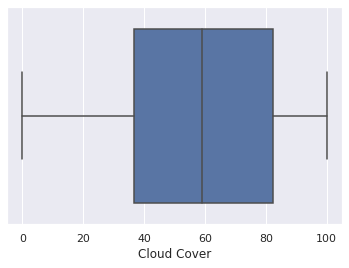

In [16]:
sns.set(style = "darkgrid")
sns.boxplot(x ='Cloud Cover', data = weather_new)
plt.show()

Over 75% of all nights don't have their cloud coverage less than 25%, which doesn't meet our requirements of a clear sky.

### Relative Humidity

>**Is the overall humidity less or over than 90%?**

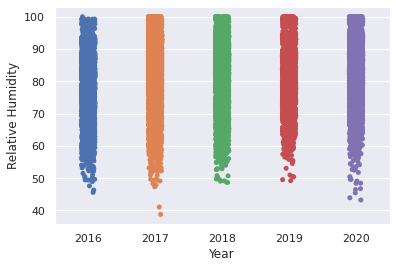

In [17]:
sns.stripplot(x = weather_new['Year'], y = weather_new["Relative Humidity"]);

Although there were many nights with humidity less than 90%, this can only represent the worst case when the telescope must be taken away, any percentage of the humidity is a harm to the apparatus. Thus, the dehumidification of an observatory is essential. Taiwan is an island surrounded by oceans, water can be easily carried by the wind.

### Windspeed

>**How do windspeed varies between months?**  
The ideal windspeed of a better observing night should lay below 15 meters per second(34 miles per hour).

In [18]:
weather_new['Wind Speed'].describe()

count    23691.000000
mean        10.839192
std          6.523337
min          0.000000
25%          5.300000
50%          9.400000
75%         15.800000
max         46.700000
Name: Wind Speed, dtype: float64

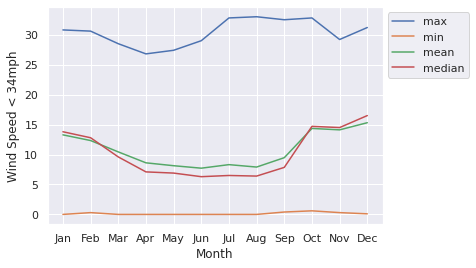

In [19]:
#Windspeed under 34 miles per hour
wind15 = weather_new[weather_new['Wind Speed'] < 34]
wind5years = wind15.groupby('Month').aggregate({"Wind Speed":['max', 'min', 'mean', 'median']})
plot_wind = wind5years.loc[:, 'Wind Speed']
windall = plot_wind.plot(xticks = range(0,12))
windall.set_xlabel("Month")
windall.set_ylabel("Wind Speed < 34mph")
windall.legend(bbox_to_anchor = (1, 1), loc = 2);

Most of the time, the windspeed is at an acceptable range, which means the wind in Zhongli won't impact our observing difficulty. Still, we can see the wind in winters were higher than other months, showing that there are chances we might not be able to observe. We can also know that low windspeed might not have the ability to blow away the clouds, which may impact the cloud coverage and visibility indirectly. The height and structure of the observatory is also one of the factor that could be influenced by the wind, the stability of the telescope determine whether the photo is in focus. 

### Visibility

>**How is the overall visibility?**  
Defining different visibility conditions and see how the sky look like in the months of years. The sky should be as clear as possible for a good seeing condition.

In [20]:
#Meaning of scales
scls = ['Dense fog', 'Thick fog', 'Moderate fog', 'Light fog', 'Thin fog', 'Haze', 'Light haze', 'Clear', 'Very clear', 'Exceptionally clear', 'Pure air']
vis_total = pd.pivot_table(weather_new, values = 'Visibility', 
                     index = ['Visibility Scale'], 
                     columns = 'Month')
vis_total = vis_total.reindex(scls)

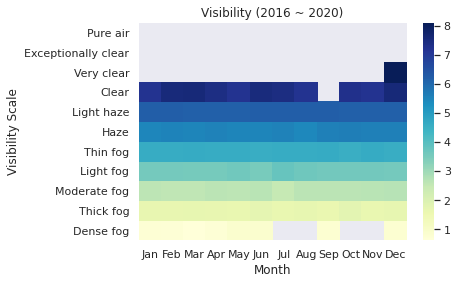

In [21]:
plt.title('Visibility (2016 ~ 2020)')
vis_scl = sns.heatmap (vis_total, cmap = "YlGnBu")
vis_scl.invert_yaxis();

Visibility is an indicator of the air quality. Two possible reasons for why the visibility is so poor should take into account. PM2.5 is the main cause of the poor visibility in winters, influenced by the sandstorm  brought from Siberia. The northeast monsoon is blocked by the central cordillera, lead to the retention of the sandstorm occupying the western Taiwan. Due to the high pressure, days without sandstorm could give a clear night to some degree. The poor visibility in springs and autumns, also in summer days without strong convection stem from Ozone, the emission from factors and vehicles. Stronger the ultraviolet, higher the concentration is. Typhoon and plum rain in summers can refresh the air, but the clouds and water could bring the observation to a halt.
As one of the crucial conditions in astronomical observations, the visibility here is absolutely worse.

### Temperature

>**What was the temperature stability at night in different seasons?**   
We will choose four random days from different seasons in 2018, and see how the temperature varies after their astronomical twilights at night.
We expect the trend of the temperature to decline as the night time falls.

In [22]:
#Select one night from each season
weather['Hour'] = weather['Date time'].dt.hour
winter = weather[(weather['Date time'] > '2018-01-01 17:00:00') & (weather['Date time'] <= '2018-01-01 22:00:00')]
spring = weather[(weather['Date time'] > '2018-04-11 18:00:00') & (weather['Date time'] <= '2018-04-11 23:00:00')]
summer = weather[(weather['Date time'] > '2018-07-21 18:00:00') & (weather['Date time'] <= '2018-07-21 23:00:00')]
autumn = weather[(weather['Date time'] > '2018-10-29 17:00:00') & (weather['Date time'] <= '2018-10-29 22:00:00')]

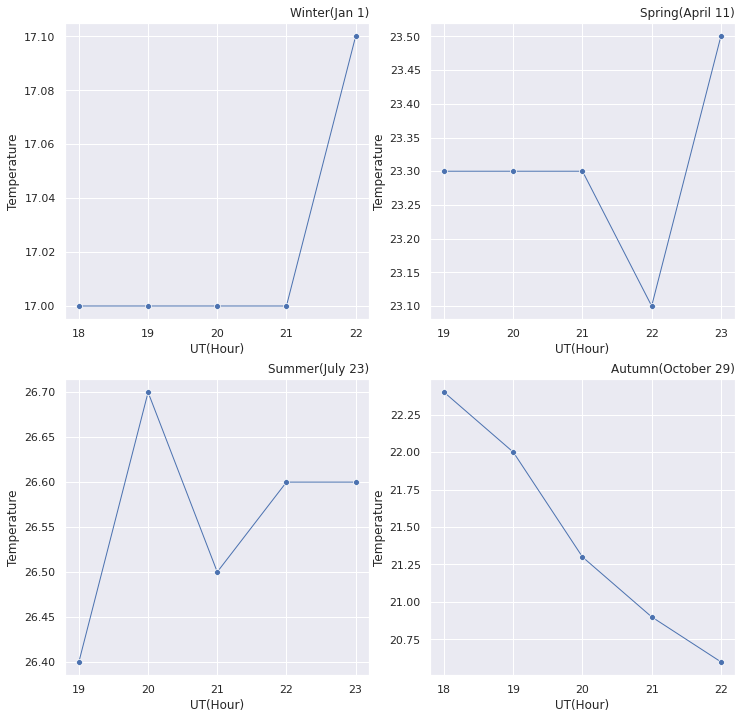

In [23]:
f, axs = plt.subplots(2,2,figsize = (12,12))

plt.subplot(2, 2, 1)
sns.lineplot(x = 'Hour', y = 'Temperature', data = winter, marker = 'o', lw = 1)
plt.title('Winter(Jan 1)', loc = 'right')
plt.xlabel('UT(Hour)')
plt.ylabel('Temperature')
plt.xticks(np.arange(min(winter['Hour']),max(winter['Hour'])+1,step = 1))

plt.subplot(2, 2, 2)
sns.lineplot(x = 'Hour', y = 'Temperature', data = spring, marker = 'o', lw = 1)
plt.title('Spring(April 11)', loc = 'right')
plt.xlabel('UT(Hour)')
plt.ylabel('Temperature')
plt.xticks(np.arange(min(spring['Hour']),max(spring['Hour'])+1,step = 1))

plt.subplot(2, 2, 3)
sns.lineplot(x = 'Hour', y = 'Temperature', data = summer, marker = 'o', lw = 1)
plt.title('Summer(July 23)', loc = 'right')
plt.xlabel('UT(Hour)')
plt.ylabel('Temperature')
plt.xticks(np.arange(min(summer['Hour']),max(summer['Hour'])+1,step = 1))

plt.subplot(2, 2, 4)
sns.lineplot(x = 'Hour', y = 'Temperature', data = autumn, marker = 'o', lw = 1)
plt.title('Autumn(October 29)', loc = 'right')
plt.xlabel('UT(Hour)')
plt.ylabel('Temperature')
plt.xticks(np.arange(min(autumn['Hour']),max(autumn['Hour'])+1,step = 1));

Though not all temperatures decline as we expected, they were almost the same after night time with only a slightly fluctuation between decimal points. Besides the average temperature, the differences among indoors and outdoors is what really matters. The outcomes of telescopes impacted by dramatical temperature differences are disturbance, fogging and deformation, which needs appropriate thermal equilibration to adjust them. 

### Photometric Nights and Spectroscopic Nights

>Generally speaking, the quality of our observation can be roughly classified into photometric nights and spectroscopic nights, which presents the overall situation of our observing nights. Without extinction, magnitude and obscuration data, we concluded our result base on the `Conditions` column. The following graph shows the fraction of all photometric nights and spectroscopic nights by month in 2016 to 2020.

In [24]:
#New column for the proportion of good conditions
night = weather_new.groupby('Month')['Conditions'].value_counts(normalize = True)
weather_new = weather_new.join(night.rename('Fraction'), on = ['Month', 'Conditions'])
weather_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23691 entries, 0 to 23690
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date time          23691 non-null  datetime64[ns]
 1   Temperature        23691 non-null  float64       
 2   Precipitation      23691 non-null  float64       
 3   Wind Speed         23691 non-null  float64       
 4   Visibility         23691 non-null  float64       
 5   Cloud Cover        23691 non-null  float64       
 6   Relative Humidity  23691 non-null  float64       
 7   Conditions         23691 non-null  object        
 8   Year               23691 non-null  int64         
 9   Month              23691 non-null  category      
 10  Visibility Scale   23691 non-null  object        
 11  Fraction           23691 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 2.0+ MB


In [25]:
#Select the photometric nights and spectroscopic nights
photo = weather_new[weather_new.Conditions.str.contains('Clear')]
spectro = weather_new[weather_new.Conditions.str.contains('Partially cloudy')]

#Rename columns for a more specific meaning in both dataframes
photo = photo.rename(columns = {'Fraction':'Photometric'})
spectro = spectro.rename(columns = {'Fraction':'Spectroscopic'})

In [26]:
#Create a new simple dataframe for plotting
photo_frac = photo[['Month', 'Photometric']]
spectro_frac = spectro[['Month', 'Spectroscopic']]

observe_nights = pd.merge(photo_frac, spectro_frac, how = 'left', on = 'Month').drop_duplicates().reset_index(drop = True).sort_values(by = 'Month')
observe_nights

,Month,Photometric,Spectroscopic
10,Jan,0.005955,0.647643
0,Feb,0.025460,0.645179
1,Mar,0.031266,0.732506
2,Apr,0.015897,0.736923
3,May,0.004963,0.788089
4,Jun,0.013846,0.781538
5,Jul,0.015881,0.852605
6,Aug,0.004467,0.809429
7,Sep,0.009744,0.759487
8,Oct,0.016873,0.627792


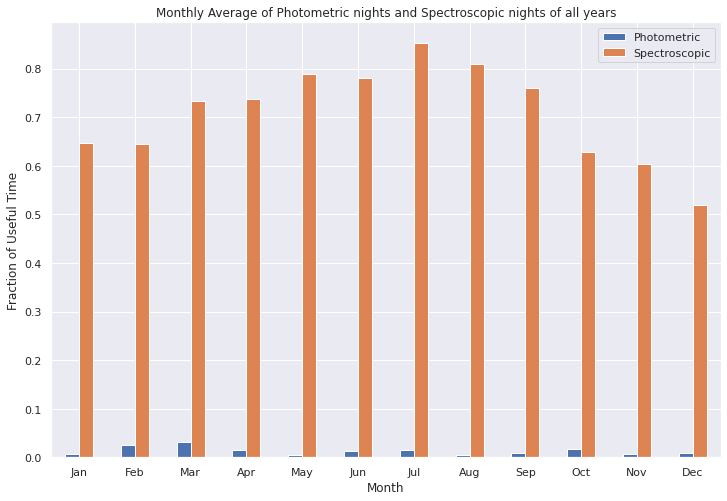

In [27]:
observe_nights.plot(x = 'Month', y = ['Photometric', 'Spectroscopic'], kind = 'bar' ,figsize = (12,8), 
      title = 'Monthly Average of Photometric nights and Spectroscopic nights of all years')
plt.xticks(rotation = 0)
plt.xlabel('Month')
plt.ylabel('Fraction of Useful Time')
plt.show()

Apparently, the useful nights in Zhongli are few and far between, the opportunity of having a decent night to observe is exceptionally valuable. 

<h1 id="sum">Summary</h1>

In summary, the conditions of observing in Zhongli is never a good idea, none of a year have a clear sky over 75 percent of all months. The sky above Zhongli is often covered with clouds and fogs, moisture comes from every direction. Its hardly to see most of the sky objects with naked eye, only the ones with higher magnitudes. The visibility during moments of using a telescope was poor in most of the time, and these were only based on the weather and its geographical conditions, not including other human negligences!

<h1 id="ref">References</h1>

[1][Astronomical Observing Conditions at Xinglong Observatory from 2007 to 2014, Ji-Cheng Zhang and others, Publications of the Astronomical Society of the Pacific
Vol. 127, No. 958 (December 2015), pp. 1292-1306](https://www.jstor.org/stable/10.1086/684369?seq=15#metadata_info_tab_contents)  
[2][Procedures for location of astronomical observatory sites, Stock, J., Le choix des sites d'observatoires astronomiques (site testing) [IAU symposium no. 19] tenu a Rome (Italie) du 1er au 6 octobre 1962 avec le concours financier du Consiglio Nazionale delle richerche. Edited by Jean Rosch. International Astronomical Union. Symposium no. 19, Gauthier-Villars, Paris, p.36-40](http://adsabs.harvard.edu/full/1964IAUS...19...35S)

<h1 id="append1">Appendix</h1>

### **The Bortle Dark Sky Scale**
The Bortle dark sky scale is a scale divided in nine levels to describe the night sky's brightness of a particular location, published by John E. Bortle in *Sky & Telescope* magazine(February, 2001) . It quantifies the astronomical observability of celestial objects and the interference caused by light pollution to help people evaluate the darkness of an observing site. Secondarily, to compare the darkness of observing sites. The scale ranges from 1(Darkest sky) to 9(Inner city sky) and presents in 9 colors on a map. This section is not a part of the data analysis process, hence in the appendix.

In [28]:
scale = pd.read_html('https://en.wikipedia.org/wiki/Bortle_scale')
scale = pd.DataFrame(scale[0])
scale

,Class,Title,NELM,Approx.SQM[3]mag/arcsec2,Description,Color
0,1,Excellentdark-sky site,7.6–8.0,21.99–22.0,the zodiacal light is visible and colorful the...,Black
1,2,Typical trulydark site,7.1–7.5,21.89–21.99,the zodiacal light is distinctly yellowish and...,Gray
2,3,Rural sky,6.6–7.0,21.69–21.89,the zodiacal light is striking in spring and a...,Blue
3,4,Rural/suburbantransition,6.1–6.5,20.49–21.69,"the zodiacal light is still visible, but does ...",Green/Yellow
4,5,Suburban sky,5.6–6.0,19.50–20.49,only hints of zodiacal light are seen on the b...,Orange
5,6,Brightsuburban sky,5.1–5.5,18.94–19.50,the zodiacal light is invisible light pollutio...,Red
6,7,Suburban/urbantransition,4.6–5.0,18.38–18.94,light pollution makes the entire sky light gra...,Red
7,8,City sky,4.1–4.5,<18.38,the sky is light gray or orange – one can easi...,White
8,9,Inner-city sky,4.0,<18.38,The sky is brilliantly lit many stars forming ...,White


(Table from [wikipedia](https://en.wikipedia.org/wiki/Bortle_scale))
* NELM: naked-eye limiting magnitude, the darkest magnitude people can see with their naked eye.

The picture below is a screenshot of the brightness in Zhongli from the [Light pollution map](https://www.lightpollutionmap.info/).

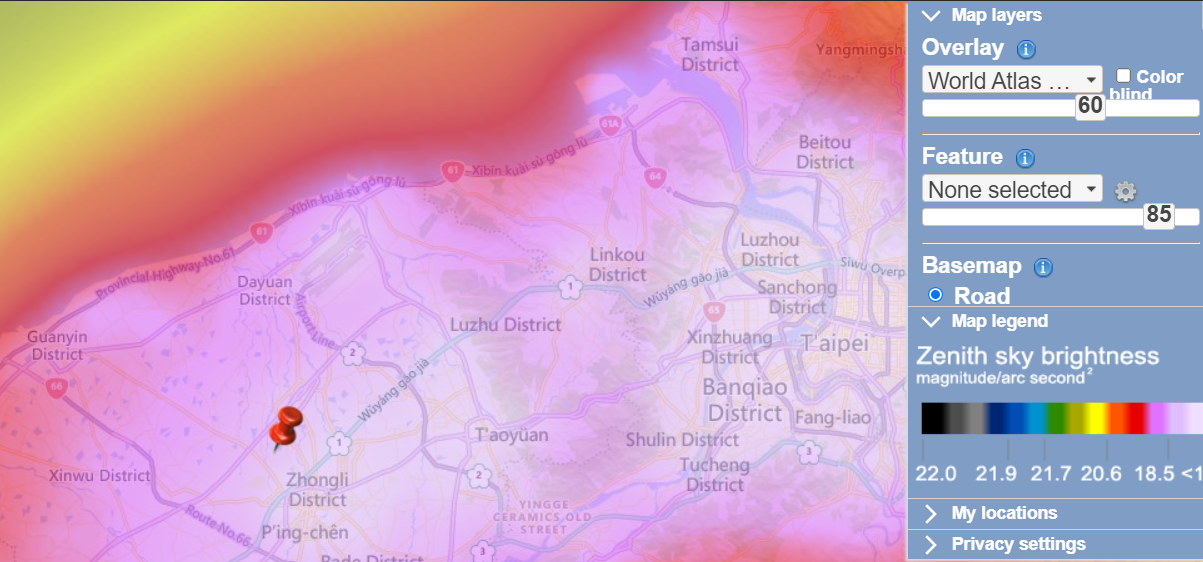

Zenith sky brightness info (2015):
* Coordinates: 24.98370, 121.20000
* SQM: 18.57 mag./arc sec2
* Brightness:	4.03 mcd/m2
* Artif. bright.:	3860 μcd/m2
* Ratio: 22.6
* Bortle class: 7
* Elevation:	101 meters

The light scale where the pin located is at class 7, which is:

**Suburban/urban transition**
1. Light pollution makes the entire sky light gray.
2. Strong light sources are evident in all directions.
3. Clouds are brightly lit.
4. The Milky Way is nearly or totally invisible.
5. M31 and M44(Messier sky objects) may be glimpsed, but with no detail.
6. Through a telescope, the brightest Messier objects are pale ghosts of their true selves.
7. When it is full moon in a dark location the sky appears like this, but with the difference that the sky appears blue.
8. Limiting magnitude with 12.5" reflector is 14.

From the information above, we can infer that Zhongli is too bright for celestial observations.

<h1 id="append2"></h1>

### **Types of Light Pollution**
As one of the polluition people don't really regard with, some reasons that caused places like Zhongli to be so bright can sort out in five possibilities:

**Type 1: Light trespass:**  
Poor control of outdoor lighting, occurs when unwanted light enters one's property.  
**Type 2: Over-illumination:**  
The excessive use of light, one of the common issues caused by the majorities.  
**Type 3: Glare:**  
Strong light or reflection that can cause blinding effect.  
**Type 4: Light clutter:**  
Excessive groupings of lights, for instance, street lamps, especially the ones without lampshades or wrong direction of irradiation.   
**Type 5: Artificial satellites**  

Natural light pollution such as moonlight can also impact our observation, thus we won't choose the time after moonrise or the direction of the moon.

*(END OF THE PROJECT)*